In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import calendar
# pd.set_option('display.max_rows', 100)


## Install_csv and EDA

In [2]:
installs_df = pd.read_csv(r'D:\JustDice-Analytics-Engineer-Hiring-Case-main\installs.csv')
len(installs_df)

216888

In [3]:
installs_df['month'] = pd.DatetimeIndex(installs_df['event_date']).month
installs_df['month_name'] = installs_df['month'].apply(lambda x: calendar.month_abbr[x])

In [4]:
installs_df.sample(5)

,install_id,country_id,app_id,network_id,event_date,device_os_version,month,month_name
98105,39a104020d3a16a8ea91b2dac1ff32b7c40b5cbf618dbc...,1,174,60,2022-11-11,10,11,Nov
103764,3683dfad89c6e165fedc5263731e729b8a6140dadd6b7b...,1,154,26,2022-04-21,9,4,Apr
204997,3c7eda3e272270dcb5b8f452d70da52ede1179cf8a1616...,109,104,10,2022-01-05,10,1,Jan
213656,4fb1772ba88da9bbf301c1901288564cf18cd584850d6f...,1,97,26,2022-04-03,9,4,Apr
28620,65c10dbf7c94538bd046e0e4853616fc16662d9806aa59...,109,121,26,2022-12-03,11,12,Dec


#### Installs Per Network Over the Months

In [5]:
monthly_network_installs = installs_df.groupby(['network_id','month','month_name'])['install_id'].size()\
                           .sort_values(ascending=True).reset_index(name='installs_per_network')
monthly_network_installs.sort_values(ascending=True,by=["month"])

,network_id,month,month_name,installs_per_network
24,26,1,Jan,6864
35,60,1,Jan,10768
13,10,1,Jan,3592
11,10,2,Feb,3034
25,60,2,Feb,7130
17,26,2,Feb,4652
15,26,3,Mar,4374
6,10,3,Mar,1444
28,60,3,Mar,7700
14,26,4,Apr,4232


In [7]:
network_installs_plot = sns.catplot(
    data=monthly_network_installs, kind="bar",
    x="month_name", y="installs_per_network", hue="network_id",
    palette=["C0", "C1", "C2", "k"], alpha=.95, height=6,order=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
)
network_installs_plot.despine(left=True)
network_installs_plot.set_axis_labels("month", " app installs")
network_installs_plot.legend.set_title("network")

#### Installs Per Country Over the Months

In [8]:
country_month_installs = installs_df.groupby(['country_id','month','month_name'])['install_id'].size()\
                        .sort_values(ascending=True).reset_index(name='installs_per_country')
country_month_installs.sort_values(by=['month'])

,country_id,month,month_name,installs_per_country
21,213,1,Jan,1637
38,109,1,Jan,8322
7,17,1,Jan,358
41,1,1,Jan,10907
20,213,2,Feb,1376
3,17,2,Feb,322
27,109,2,Feb,4229
40,1,2,Feb,8889
37,1,3,Mar,8137
18,213,3,Mar,862


In [9]:
country_installs_plot = sns.catplot(
    data=country_month_installs, kind="bar",
    x="month_name", y="installs_per_country", hue="country_id",
    palette=["C0", "C1", "C2", "k"], alpha=.95, height=6,order=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
)
country_installs_plot.despine(left=True)
country_installs_plot.set_axis_labels("month", " app installs")
country_installs_plot.legend.set_title("country")

#### Monthly Installs 

In [10]:

monthly_installs = country_month_installs.groupby(['month','month_name'])['installs_per_country'].sum()\
                        .sort_values(ascending=True).reset_index(name='monthly_installs')
monthly_installs.sort_values(by=['month'])

,month,month_name,monthly_installs
9,1,Jan,21224
3,2,Feb,14816
2,3,Mar,13518
0,4,Apr,11342
1,5,May,13424
4,6,Jun,14906
6,7,Jul,17844
11,8,Aug,30428
8,9,Sep,19945
5,10,Oct,17387


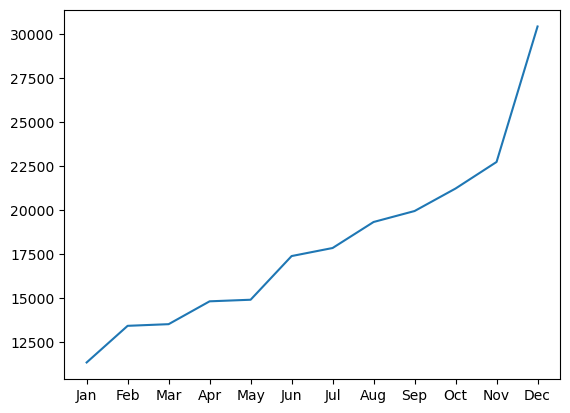

In [66]:
labels = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
plt.plot(monthly_installs["month_name"],monthly_installs["monthly_installs"])
# plt.xticks(monthly_installs["month_name"], labels)

plt.show()

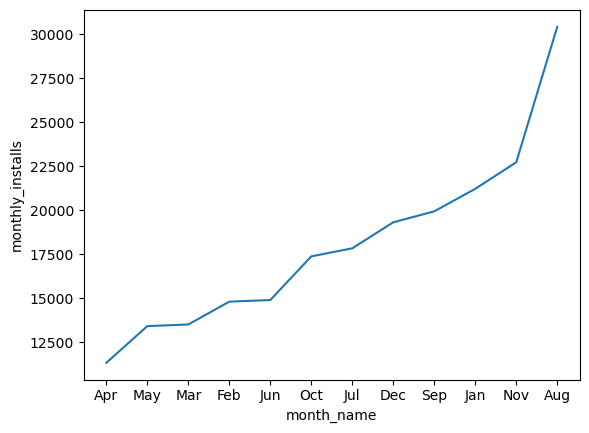

In [60]:
sns.lineplot(x="month_name", y="monthly_installs", data=monthly_installs,sort=False)
plt.show()

In [11]:
installs_per_con_per_app_per_net = installs_df.groupby(['country_id','app_id','network_id']).agg({'install_id': ['count']})\
                         .rename(columns={'install_id':'install_count'})\
                         .sort_values(ascending=False,by=['country_id','app_id','network_id']).reset_index()
installs_per_con_per_app_per_net

,country_id,app_id,network_id,install_count
,,,,count
0,213,405,26,1
1,213,404,26,2
2,213,402,26,4
3,213,390,26,5
4,213,380,26,40
...,...,...,...,...
290,1,73,26,539
291,1,73,10,221
292,1,71,60,4322


In [12]:
install_app = installs_df.groupby(['install_id','app_id']).agg({'install_id': ['count'],'app_id':['count']})\
                         .rename(columns={'install_id':'install_count','app_id':'app_count'})\
                         .sort_values(ascending=False,by=['app_id']).reset_index()
install_app

,install_id,app_id,install_count,app_count
,,,count,count
0,9d6f82d11e310d98b90348715087fd9aa1e5f3e8cff30e...,408,1,1
1,bc68c44ff8662aad8d9e67dd84675ab211efaaf19ce747...,408,1,1
2,ef13609c277f22cf0831e219983bc84be61978528a11a8...,408,1,1
3,51c1061de7998c3a35141ed3ba4b06a1b7af240d842cd3...,408,1,1
4,bc974875a4964721951d3af72bf74bf58606b62b9bba4c...,408,1,1
...,...,...,...,...
216882,b0004a3d17057319223b7ca102d646ab584f29a58aacad...,71,1,1
216883,1219c3b3a8628e50199e174a978a2d6609d4577ef04241...,71,1,1
216884,1219656bd87400dfaa9469aece07cb054186dc7a83bb35...,71,1,1


In [13]:
installs_df.event_date.sort_values()

193106    2022-01-01
124603    2022-01-01
186286    2022-01-01
183117    2022-01-01
207947    2022-01-01
             ...    
23307     2022-12-31
30729     2022-12-31
184373    2022-12-31
209197    2022-12-31
30908     2022-12-31
Name: event_date, Length: 216888, dtype: object

In [14]:
installs_df.groupby(['event_date']).size().sort_values(ascending=False)

event_date
2022-08-26    1430
2022-08-21    1392
2022-08-20    1182
2022-08-22    1172
2022-08-07    1168
              ... 
2022-05-03     319
2022-05-05     318
2022-04-28     314
2022-04-21     313
2022-04-14     283
Length: 365, dtype: int64

In [15]:
install_per_country = installs_df.groupby(['country_id'])['install_id'].size().sort_values(ascending=False).reset_index(name='installs_per_country')
install_per_country

,country_id,installs_per_country
0,1,135242
1,109,61841
2,17,10671
3,213,9134


In [16]:
device_os = installs_df.groupby(['device_os_version']).size().sort_values(ascending=False).reset_index(name='count_per_os_version')
device_os

,device_os_version,count_per_os_version
0,11,79355
1,12,56679
2,10,45660
3,9,16285
4,8.0.0,5736
...,...,...
76,15.1.1,1
77,4.9.77+,1
78,4.9.227-22722052,1
79,4.9.227-21443963,1


In [17]:
network = installs_df.groupby(['network_id']).size().sort_values(ascending=False).reset_index(name='networks_counts')

In [18]:
network

,network_id,networks_counts
0,60,110463
1,26,73979
2,10,26345
3,1111,6101


In [19]:
install_per_country.dtypes

country_id              int64
installs_per_country    int64
dtype: object

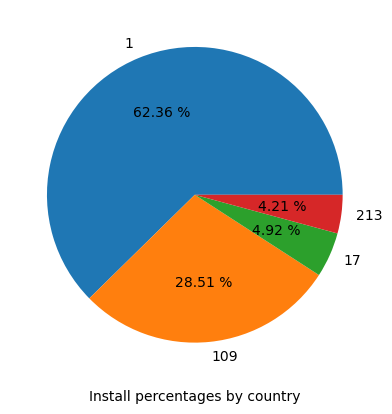

In [58]:
plt.pie(x="installs_per_country",labels="country_id", data=install_per_country, autopct="%.2f %%")
plt.xlabel("Install percentages by country")
plt.show()

In [21]:
installs_df.groupby(['app_id']).size().sort_values(ascending=False).reset_index(name='app_count_per_id')

,app_id,app_count_per_id
0,174,47416
1,121,39868
2,94,32265
3,189,10082
4,71,8300
5,122,7955
6,154,7694
7,97,7370
8,256,6184
9,104,5286


In [22]:
installs_df.groupby(['install_id']).size().sort_values(ascending=False).reset_index(name='install_count')

,install_id,install_count
0,1c58d3e7cabdedd63737a5e99b7ccc27c42e47cbb85b74...,2
1,0000489f6697ab477e9fae03ab0edc6eb6c79e30c9675f...,1
2,ab364f5872942656c0c459fc15bb9245db0c3e9a1f0bdb...,1
3,ab34384c875c702dccfa12523ad5cc9fe28abec68aaa25...,1
4,ab34a2823057dbbd154b8d502c1334dd928af48641c043...,1
...,...,...
216882,557957562b48e043efdeac39428df17e68a07b343184b7...,1
216883,557a2fb115d359daf5f7608c405da61fc8927c1c839838...,1
216884,557a4162faf08e19811578c0f3a3818895c58a5c0f59f7...,1
216885,557a42ede81d95323bcb55c0767329c14c66c01364245e...,1


In [23]:
install_per_app_count = installs_df.groupby(['app_id'])['install_id'].size().sort_values(ascending=False).reset_index(name='installs_per_app_count')
install_per_app_count

,app_id,installs_per_app_count
0,174,47416
1,121,39868
2,94,32265
3,189,10082
4,71,8300
5,122,7955
6,154,7694
7,97,7370
8,256,6184
9,104,5286


In [24]:
install_per_network = installs_df.groupby(['network_id'])['install_id'].size().sort_values(ascending=False).reset_index(name='installs_per_network')
install_per_network

,network_id,installs_per_network
0,60,110463
1,26,73979
2,10,26345
3,1111,6101


In [64]:
install_per_country_per_os = installs_df.groupby(['country_id','device_os_version'])['install_id'].size().sort_values(ascending=False).reset_index(name='installs_per_os_per_country')
install_per_country_per_os.head(20)

,country_id,device_os_version,installs_per_os_per_country
0,1,12,43391
1,1,11,43260
2,1,10,26989
3,109,11,25849
4,109,10,15309
5,109,12,10426
6,1,9,10335
7,17,11,5380
8,213,11,4866
9,109,9,4418


#### Summary of Installs_csv

- There are 51 unique apps in install_csv
- There are 4 countries where apps were installed
- There are 4 unique mobile ad networks
- There are 81 mobile os
- There were 216877 number of installations
- App Id 174 tops in being installed the most with 47416
- Network Id 60 has the most count 110463

## Revenue

In [25]:
revenue_df = pd.read_csv(r'D:\JustDice-Analytics-Engineer-Hiring-Case-main\revenue.csv')

In [26]:
revenue_df

,install_id,event_date,value_usd
0,213197bd66cd889d103ab9059709458e49808214837508...,2022-12-16,1.58000
1,251442e25a39fb706e242445db49498ba1d6762c1ff46e...,2022-12-21,6.75000
2,3e7bdaca309c5eea9d4004a0400b5a830f3963bddc71f8...,2022-12-21,1.62000
3,9505bab0515c96b7d8c9a5aeb1fb28ae397b23badb2f03...,2022-12-20,0.00150
4,fa69bdded229f9ebb18290559d77cefbd8e5ad83d74b86...,2022-12-16,0.54000
...,...,...,...
2629309,4356d41fe3eaf6b8519fe29268f3325b496ffccc50aa93...,2022-01-09,0.00200
2629310,4356d41fe3eaf6b8519fe29268f3325b496ffccc50aa93...,2022-01-09,0.02648
2629311,4356d41fe3eaf6b8519fe29268f3325b496ffccc50aa93...,2022-01-09,0.00200
2629312,ac1da1cd8464aa8206b4372578ef15a273e06db5227182...,2022-01-09,1.05000


In [27]:
installs_df.assign(InDf2=installs_df.install_id.isin(revenue_df.install_id).astype(int))

,install_id,country_id,app_id,network_id,event_date,device_os_version,month,month_name,InDf2
0,6b168a9f7a13119b87bfeb834d159f6879ff000205cb27...,1,174,26,2022-12-13,10,12,Dec,0
1,218ecd973c988fe76dfd247f92e9317485010844163a51...,1,174,60,2022-12-14,10,12,Dec,0
2,f67c1382fc3af8a24cb6f23bff381279d582eb67d4043e...,17,122,26,2022-12-30,11,12,Dec,0
3,afe4dc7c1663fba7ba3bc7cf6a308c38c1cb409d253f7f...,1,121,1111,2022-12-30,8.0.0,12,Dec,0
4,417acac6a6bdb88a83371f8ab482691d16896e8681afcb...,109,325,10,2022-12-05,11,12,Dec,1
...,...,...,...,...,...,...,...,...,...
216883,19be0a9a4458de0d52547e141df90507cf6432ff8ac512...,213,184,60,2022-01-08,10,1,Jan,1
216884,a39a5e320f0cad2c67184302a1e5deeea9c12a1fa9a34d...,109,121,60,2022-01-08,11,1,Jan,0
216885,e6a9b7812608a10ba6a5c654e33ee2482a4e6cd4f9ec2f...,109,121,26,2022-01-08,11,1,Jan,1
216886,e0fd2cee99c16389dd64ba242471d5709f64033b03fb08...,109,174,60,2022-01-08,10,1,Jan,0


In [28]:
revenue_df.event_date.min(),revenue_df.event_date.max()

('2022-01-01', '2022-12-31')

In [29]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [30]:

revenue_sum_df = revenue_df.groupby(["install_id","event_date"])['value_usd'].sum().sort_values(ascending=False).reset_index(name='revenue_sum')

In [31]:
revenue_sum_df

,install_id,event_date,revenue_sum
0,32d919812d2cb1a810bb1cf2d3b89948f5055e26d02848...,2022-05-01,62.420
1,b18e32862277cef10fc4f9956671506a888ac19492a0ad...,2022-07-29,58.270
2,097b9f17ee48a7e6a3bb8beea6f4444e69fec7cbf84d25...,2022-05-02,56.970
3,42ef6c6122e94cfbb3e733bd0cd9183b41fdcf86fc8556...,2022-12-06,56.860
4,f411e3f29656d495f989d4e37399a52f13818d8ff8f9c9...,2022-02-21,56.250
...,...,...,...
151717,4a9082b68258e414c55a43442ad47b4b915eb966dda306...,2022-01-16,-0.000
151718,62091f8f3e5b4028dadfa1cfa0553e7c51f45ae6d6a4b8...,2022-01-30,-0.000
151719,9fc70f012ad36031bc788d4ee0d975392c56892b5a2383...,2022-10-03,-0.000
151720,9fc70f012ad36031bc788d4ee0d975392c56892b5a2383...,2022-10-04,-0.000


#### Joining revenue data with installs data

In [32]:
revenue_sum_install_df = pd.merge(installs_df,revenue_sum_df,on=['install_id','event_date'],how='right')
revenue_sum_install_df.sort_values(ascending=False,by='revenue_sum')

,install_id,country_id,app_id,network_id,event_date,device_os_version,month,month_name,revenue_sum
0,32d919812d2cb1a810bb1cf2d3b89948f5055e26d02848...,NaN,NaN,NaN,2022-05-01,NaN,NaN,NaN,62.420
1,b18e32862277cef10fc4f9956671506a888ac19492a0ad...,NaN,NaN,NaN,2022-07-29,NaN,NaN,NaN,58.270
2,097b9f17ee48a7e6a3bb8beea6f4444e69fec7cbf84d25...,1.000,121.000,26.000,2022-05-02,12,5.000,May,56.970
3,42ef6c6122e94cfbb3e733bd0cd9183b41fdcf86fc8556...,1.000,94.000,60.000,2022-12-06,13,12.000,Dec,56.860
4,f411e3f29656d495f989d4e37399a52f13818d8ff8f9c9...,1.000,94.000,10.000,2022-02-21,11,2.000,Feb,56.250
...,...,...,...,...,...,...,...,...,...
151717,4a9082b68258e414c55a43442ad47b4b915eb966dda306...,NaN,NaN,NaN,2022-01-16,NaN,NaN,NaN,-0.000
151718,62091f8f3e5b4028dadfa1cfa0553e7c51f45ae6d6a4b8...,1.000,237.000,26.000,2022-01-30,7.1.1,1.000,Jan,-0.000
151719,9fc70f012ad36031bc788d4ee0d975392c56892b5a2383...,NaN,NaN,NaN,2022-10-03,NaN,NaN,NaN,-0.000
151720,9fc70f012ad36031bc788d4ee0d975392c56892b5a2383...,NaN,NaN,NaN,2022-10-04,NaN,NaN,NaN,-0.000


In [33]:
revenue_sum_install_df.sort_values(ascending=False,by='revenue_sum').head(30)

,install_id,country_id,app_id,network_id,event_date,device_os_version,month,month_name,revenue_sum
0,32d919812d2cb1a810bb1cf2d3b89948f5055e26d02848...,NaN,NaN,NaN,2022-05-01,NaN,NaN,NaN,62.420
1,b18e32862277cef10fc4f9956671506a888ac19492a0ad...,NaN,NaN,NaN,2022-07-29,NaN,NaN,NaN,58.270
2,097b9f17ee48a7e6a3bb8beea6f4444e69fec7cbf84d25...,1.000,121.000,26.000,2022-05-02,12,5.000,May,56.970
3,42ef6c6122e94cfbb3e733bd0cd9183b41fdcf86fc8556...,1.000,94.000,60.000,2022-12-06,13,12.000,Dec,56.860
4,f411e3f29656d495f989d4e37399a52f13818d8ff8f9c9...,1.000,94.000,10.000,2022-02-21,11,2.000,Feb,56.250
5,c057b83e56e0abda73aa9282a15902bca7f3a9e951105d...,1.000,94.000,26.000,2022-06-12,12,6.000,Jun,56.030
6,58386b3403601d1895438ef3fd38279e23db746540bee9...,NaN,NaN,NaN,2022-04-20,NaN,NaN,NaN,55.443
7,1638648a5a15c419e6f50de65679b544058b153c715668...,1.000,94.000,10.000,2022-07-08,12,7.000,Jul,54.000
8,09c603aa4a1374c8e878bbab672cf77f9dc52429b8c548...,NaN,NaN,NaN,2022-03-02,NaN,NaN,NaN,53.550
9,0b5cd87aaafb0a2cb96e173d31c5b9e417eb4a0be79bcd...,1.000,94.000,10.000,2022-02-04,11,2.000,Feb,53.100


In [34]:
revenue_sum_install_df.groupby(["install_id","event_date","country_id","app_id","network_id"])['revenue_sum'].sum().sort_values(ascending=False).reset_index(name='revenue_sum')

,install_id,event_date,country_id,app_id,network_id,revenue_sum
0,097b9f17ee48a7e6a3bb8beea6f4444e69fec7cbf84d25...,2022-05-02,1.000,121.000,26.000,56.970
1,42ef6c6122e94cfbb3e733bd0cd9183b41fdcf86fc8556...,2022-12-06,1.000,94.000,60.000,56.860
2,f411e3f29656d495f989d4e37399a52f13818d8ff8f9c9...,2022-02-21,1.000,94.000,10.000,56.250
3,c057b83e56e0abda73aa9282a15902bca7f3a9e951105d...,2022-06-12,1.000,94.000,26.000,56.030
4,1638648a5a15c419e6f50de65679b544058b153c715668...,2022-07-08,1.000,94.000,10.000,54.000
...,...,...,...,...,...,...
74652,08657777fd0c45f583a3eb033b9408f1b1e68446cae457...,2022-10-12,213.000,189.000,60.000,-0.000
74653,f52108164c0d08bc71ce7c6609cb7809064038a70435ce...,2022-01-05,17.000,237.000,26.000,-0.000
74654,fa7f1704f15fda4f6c33c3787301431f4be6bf83881a8c...,2022-07-26,17.000,237.000,26.000,-0.000
74655,a4edb140df238a8fcb96be99d625b3cf52563c0c05b167...,2022-02-25,109.000,219.000,26.000,-0.000


In [35]:
revenue_sum_install_df[(revenue_sum_install_df["revenue_sum"] == -0.000) & (revenue_sum_install_df["app_id"] == 237)]

,install_id,country_id,app_id,network_id,event_date,device_os_version,month,month_name,revenue_sum
151168,b0aa036af3ec87bc08881af0556ca0cc8ebee9c490670c...,213.000,237.000,26.000,2022-10-17,9,10.000,Oct,0.000
151179,2ac4acf7708724d4e46facdb2e080aaf4b536ade59e1f6...,1.000,237.000,26.000,2022-04-17,11,4.000,Apr,0.000
151197,cf3f4f2308425692123c4cacc0f60ac924c91b65a45b94...,213.000,237.000,26.000,2022-09-10,12,9.000,Sep,0.000
151206,2b8a4c15e8120dc79a840f84127ee5a82d88f7b32e04ea...,1.000,237.000,26.000,2022-09-22,12,9.000,Sep,0.000
151251,84e14a53f8707c2f021c76d7e359ec8293a713f99208ef...,17.000,237.000,26.000,2022-03-11,11,3.000,Mar,0.000
151270,faccd2e72888f2bc21e278975dd6fc40579ec659cfa617...,213.000,237.000,26.000,2022-02-19,11,2.000,Feb,0.000
151273,c181a4c82268447e12d4709b83543dbe790f2b39dd5035...,109.000,237.000,26.000,2022-09-19,12,9.000,Sep,0.000
151277,acfa37649f0c89cffe922d697b1292600aa45dc8862782...,213.000,237.000,26.000,2022-03-15,8.1.0,3.000,Mar,0.000
151291,aa5825432d816d6c9a111f3f73f34b139a912919efb684...,1.000,237.000,26.000,2022-06-18,10,6.000,Jun,0.000
151292,ef7edbcdcb2f155da45ea05c670093e116e3fe04171b43...,213.000,237.000,26.000,2022-04-07,11,4.000,Apr,0.000


In [36]:
len(revenue_sum_install_df[revenue_sum_install_df["revenue_sum"] <= 0])

556

In [37]:
revenue_sum_install_df.event_date.min(),revenue_sum_install_df.event_date.max()

('2022-01-01', '2022-12-31')

## Adspend

In [38]:
adspend_df = pd.read_csv(r'D:\JustDice-Analytics-Engineer-Hiring-Case-main\adspend.csv')
adspend_df.sort_values(ascending=False,by='value_usd')

,event_date,country_id,network_id,client_id,value_usd
10494,2022-11-13,1,60,174,1152.598
10717,2022-11-20,1,60,174,960.589
10561,2022-11-15,1,60,174,928.077
10528,2022-11-14,1,60,174,890.448
10463,2022-11-12,1,60,174,821.045
...,...,...,...,...,...
7332,2022-08-15,17,60,154,0.000
7333,2022-08-15,17,60,174,0.000
7345,2022-08-15,109,60,73,0.000
7348,2022-08-15,109,60,97,0.000


In [39]:
adspend_df['month'] = pd.DatetimeIndex(adspend_df['event_date']).month
adspend_df['month_name'] = adspend_df['month'].apply(lambda x: calendar.month_abbr[x])

##### Adspend by country

In [40]:
adspend_df.groupby(["country_id"])['value_usd'].sum().sort_values(ascending=False).reset_index(name='adspend_per_country')

,country_id,adspend_per_country
0,1,243186.688
1,109,10053.718
2,213,501.178
3,17,334.392


##### Adspend by date specific in each country

In [41]:
adspend_country_date_specific = adspend_df.groupby(["country_id","event_date"])['value_usd'].sum()\
                                .sort_values(ascending=False).reset_index(name='adspend_country_date_specific')
adspend_country_date_specific.sort_values(by=["event_date"])

,country_id,event_date,adspend_country_date_specific
378,109,2022-01-01,64.445
695,213,2022-01-01,7.854
131,1,2022-01-01,710.341
764,17,2022-01-01,3.860
839,17,2022-01-02,2.470
...,...,...,...
210,1,2022-12-30,549.052
767,109,2022-12-30,3.741
794,109,2022-12-31,3.035
328,1,2022-12-31,378.410


##### adspend monthly basis by country

In [42]:
adspend_country_monthly = adspend_df.groupby(["country_id","month","month_name"])['value_usd'].sum()\
                                .sort_values(ascending=False).reset_index(name='adspend_country_monthly')
                                
adspend_country_monthly.sort_values(by=["month"])

,country_id,month,month_name,adspend_country_monthly
24,213,1,Jan,149.558
3,1,1,Jan,22478.823
12,109,1,Jan,1802.592
27,17,1,Jan,46.810
6,1,2,Feb,18163.299
30,17,2,Feb,38.445
19,109,2,Feb,764.542
25,213,2,Feb,107.799
18,109,3,Mar,823.068
44,17,3,Mar,12.690


In [67]:
country_installs_plot = sns.catplot(
    data=adspend_country_monthly, kind="bar",
    x="month_name", y="adspend_country_monthly", hue="country_id",
    palette=["C0", "C1", "C2", "k"], alpha=.95, height=6,order=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
)
country_installs_plot.despine(left=True)
country_installs_plot.set_axis_labels("month", " spendings")
country_installs_plot.legend.set_title("country")

In [44]:
adspend_df.groupby(["client_id"])['value_usd'].sum().sort_values(ascending=False).reset_index(name='adspend_per_client')

,client_id,adspend_per_client
0,174,104606.688
1,94,71636.985
2,121,42158.106
3,71,11021.333
4,189,4474.770
5,104,3187.531
6,256,2968.805
7,302,2631.670
8,275,1998.470
9,380,1764.217


##### Adspend on network

In [45]:
adspend_df.groupby(["network_id"])['value_usd'].sum().sort_values(ascending=False).reset_index(name='adspend_sum_per_network')

,network_id,adspend_sum_per_network
0,60,214838.615
1,10,39237.361


##### Adspend on client

In [46]:
adspend_df.groupby(["client_id"])['value_usd'].sum().sort_values(ascending=False).reset_index(name='adspend_per_client')

,client_id,adspend_per_client
0,174,104606.688
1,94,71636.985
2,121,42158.106
3,71,11021.333
4,189,4474.770
5,104,3187.531
6,256,2968.805
7,302,2631.670
8,275,1998.470
9,380,1764.217


## Payout

In [47]:
payouts_df = pd.read_csv(r'D:\JustDice-Analytics-Engineer-Hiring-Case-main\payouts.csv')
payouts_df.sort_values(ascending=False,by="value_usd")

,install_id,event_date,value_usd
31065,e3ecfd1ff2a32f0f25e889deaf360171786299974ceb39...,2022-01-19,28.508
42652,3c2d8a7d967ba72c18c0bf8bd3a73b68f20ef08d5f6ccc...,2022-02-07,22.928
29973,31d3c55761849d154cbc5db8d123b0c305f0795fa93224...,2022-02-08,22.894
40508,43c1f57b8f95f35f5152ff704932a645f5c52ad20c5709...,2022-02-09,22.894
50743,e28700621a060e7ad16948e021a500dab3bca2224c3de5...,2022-02-10,22.816
...,...,...,...
47536,0eb40dbaa06c6f82e0f0aa85a22d46d1430af2f2ba19ca...,2022-09-29,0.239
14728,357915fdcc3ca3a34e90e1bed1f0e32c9c99a210e48f7a...,2022-09-29,0.239
11136,e10197d669522a9aa76bb7ef86795c4f0dee25138c9e39...,2022-09-29,0.239
11134,919fdd866530e2858f28bd105e24362d539d1524079f37...,2022-09-29,0.239


#### Joining revenue with payout

In [48]:
revenue_payout_df = pd.merge(payouts_df,revenue_df,on=['install_id','event_date'],suffixes=('_payout','_revenue'))

In [49]:
revenue_payout_df['month'] = pd.DatetimeIndex(revenue_payout_df['event_date']).month
revenue_payout_df['month_name'] = revenue_payout_df['month'].apply(lambda x: calendar.month_abbr[x])

In [50]:
revenue_payout_df

,install_id,event_date,value_usd_payout,value_usd_revenue,month,month_name
0,8912076a49c7b17960f8d262dc37599f86cbb3da8912b6...,2022-12-21,0.254,0.760,12,Dec
1,8912076a49c7b17960f8d262dc37599f86cbb3da8912b6...,2022-12-21,0.254,1.170,12,Dec
2,5d1ce288f9dbc98745bb235b3ffd32a0cf906fcdb52e7b...,2022-12-05,0.358,1.080,12,Dec
3,f4cd839669220bdad4a5e9a166d424ec02c45d4ede3bb6...,2022-12-21,0.360,0.540,12,Dec
4,af81e3ac1841ab9493640a559c44821d4bd1f1a610262e...,2022-12-04,0.706,3.150,12,Dec
...,...,...,...,...,...,...
34174,5416f5bd483d76e684e0d3ed090fd10342c3168f0fa492...,2022-01-27,0.383,0.730,1,Jan
34175,4fb5afa7d5dfd772e84bae4979a64fdf9cea75420294f1...,2022-01-26,0.757,3.150,1,Jan
34176,4fb5afa7d5dfd772e84bae4979a64fdf9cea75420294f1...,2022-01-26,0.757,3.150,1,Jan
34177,4fb5afa7d5dfd772e84bae4979a64fdf9cea75420294f1...,2022-01-26,0.384,3.150,1,Jan


In [51]:
rev_pay_sum_df = revenue_payout_df.groupby(["install_id","event_date","month_name","month"]).agg({"value_usd_payout":"sum","value_usd_revenue":"sum"})\
                 .rename(columns={"value_usd_payout":"payout_sum","value_usd_revenue":"revenue_sum"})\
                 .reset_index()
rev_pay_sum_df.sort_values(ascending=False,by=["revenue_sum","payout_sum"])

,install_id,event_date,month_name,month,payout_sum,revenue_sum
2267,3bdf2049449418e17fa500fb4a4fca6b378d1e37166f6c...,2022-09-22,Sep,9,12.491,1350.000
1779,2fc028097ef47fa7ba65dc1bca17231ead5d7e566da664...,2022-09-21,Sep,9,11.983,1296.000
4977,7ee33b5ef1e8f8cbcce4ec715ac821be8897b2992c0519...,2022-09-22,Sep,9,12.422,1242.000
7209,b8d75e811c5fbffdc1562a122055bdf6beab692f52d8a9...,2022-09-21,Sep,9,11.744,1242.000
1967,3445ce22cc3101ceea647a110d1839ffcb7c49bc4863de...,2022-09-22,Sep,9,11.015,1161.000
...,...,...,...,...,...,...
2021,35b139234b8c42915947627f23b235c57a397193378caa...,2022-08-26,Aug,8,6.281,0.000
5011,7fcc6768669fd9b57f6e0f0053dd57f66731cffa482601...,2022-05-09,May,5,0.761,0.000
9160,e926620c139c441b5580abaccbfe13ff45706a53a92eae...,2022-03-14,Mar,3,0.549,0.000
2728,47e57a6aa3146bcb8286b3aa78db3d097d824502b91ba3...,2022-09-06,Sep,9,0.496,0.000


In [52]:
monthly_rev_pay_sum_df = rev_pay_sum_df.groupby(["month_name","month"]).agg({"payout_sum":"sum","revenue_sum":"sum"}).reset_index()
monthly_rev_pay_sum_df = monthly_rev_pay_sum_df.sort_values(ascending=True,by=["month"])

In [53]:
monthly_rev_pay_sum_df

,month_name,month,payout_sum,revenue_sum
4,Jan,1,2445.800,2382.363
3,Feb,2,1857.028,2505.345
7,Mar,3,1991.702,1613.195
0,Apr,4,1639.422,1440.934
8,May,5,1617.786,2936.534
6,Jun,6,1886.858,2708.339
5,Jul,7,2324.670,2395.268
1,Aug,8,4160.377,6504.977
11,Sep,9,4412.415,54508.676
10,Oct,10,2557.904,4156.647


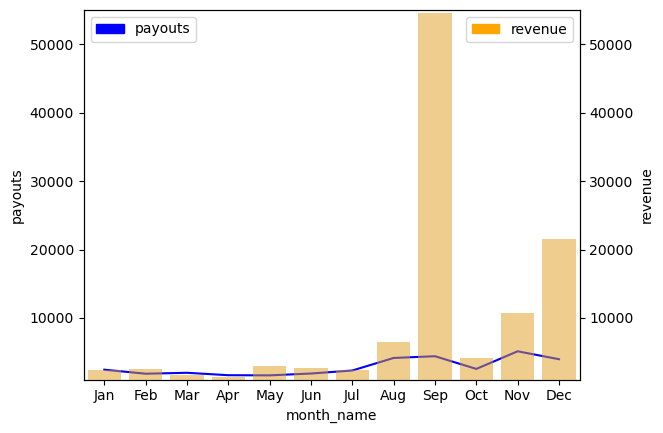

In [69]:
import matplotlib.patches as mpatches
# plot line graph on axis #1
ax1 = sns.lineplot(
    x=monthly_rev_pay_sum_df.month_name, 
    y='payout_sum', 
    data=monthly_rev_pay_sum_df, 
    sort=False, 
    color='blue'
)
ax1.set_ylabel('payouts')
ax1.set_ylim(1000, 55000)
ax1_patch = mpatches.Patch(color='blue', label='payouts')
ax1.legend(handles=[ax1_patch], loc="upper left")
# set up the 2nd axis
ax2 = ax1.twinx()
# plot bar chart on axis #2
sns.barplot(
    x=monthly_rev_pay_sum_df.month_name, 
    y='revenue_sum', 
    data=monthly_rev_pay_sum_df, 
    order=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'],
    color='orange', 
    alpha=0.5, 
    ax = ax2       # Pre-existing axes for the plot
)
ax2.grid(False) # turn off grid #2
ax2.set_ylabel('revenue')
ax2.set_ylim(1000, 55000)
ax2_patch = mpatches.Patch(color='orange', label='revenue')
ax2.legend(handles=[ax2_patch], loc="upper right")
plt.show()

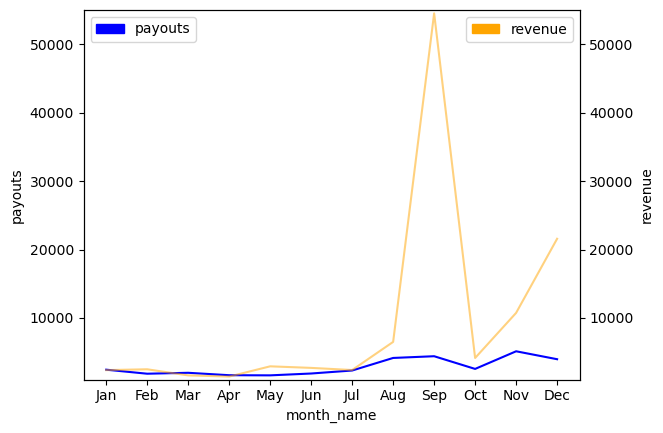

In [55]:
# sns.lineplot(x='month_name', y='payout_sum', hue='revenue_sum', 
#              data=(rev_pay_sum_df, ['month_name']),
#              palette=['red', 'blue'])

import matplotlib.patches as mpatches
# plot line graph on axis #1
ax1 = sns.lineplot(
    x=monthly_rev_pay_sum_df.month_name, 
    y='payout_sum', 
    data=monthly_rev_pay_sum_df, 
    sort=False, 
    color='blue'
)
ax1.set_ylabel('payouts')
ax1.set_ylim(1000, 55000)
ax1_patch = mpatches.Patch(color='blue', label='payouts')
ax1.legend(handles=[ax1_patch], loc="upper left")
# set up the 2nd axis
ax2 = ax1.twinx()
# plot bar chart on axis #2
sns.lineplot(
    x=monthly_rev_pay_sum_df.month_name, 
    y='revenue_sum', 
    data=monthly_rev_pay_sum_df, 
    # order=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'],
    color='orange', 
    sort=False,
    alpha=0.5, 
    ax = ax2       # Pre-existing axes for the plot
)
ax2.grid(False) # turn off grid #2
ax2.set_ylabel('revenue')
ax2.set_ylim(1000, 55000)
ax2_patch = mpatches.Patch(color='orange', label='revenue')
ax2.legend(handles=[ax2_patch], loc="upper right")
plt.show()

## Joinning revenue_payout with installs 